<a href="https://colab.research.google.com/github/EliudNGARUIYA/Machine-Learning-Projects/blob/main/ICEA_LION_Case_Study_Candidate_Assessment_(Ngaruiya).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ICEA LION Group - Case Study Notebook
### Eliud Ngaruiya (11/09/2022)

## Import all necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Load data and Preprocess

In [ ]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('/content/credit_risk_dataset_training.csv')

In [ ]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [ ]:
# number of rows and columns
loan_dataset.shape

(22850, 12)

In [ ]:
# statistical measures
loan_dataset.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,22850.000000,2.285000e+04,22237.000000,22850.000000,20703.000000,22850.000000,22850.000000,22850.000000
mean,27.717812,6.604363e+04,4.800018,9595.500000,11.014324,0.220306,0.170243,5.801400
std,6.327822,6.423370e+04,4.112390,6327.603663,3.244035,0.414462,0.106557,4.050767
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.840000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.939500e+04,7.000000,12250.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.780000,30.000000


In [ ]:
# number of missing values in each column
loan_dataset.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              613
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2147
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [ ]:
# number of missing values in each column
loan_dataset.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [ ]:
# label encoding
loan_dataset.replace({"cb_person_default_on_file":{'N':0,'Y':1}},inplace=True)

In [ ]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,1,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,0,2
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,0,2
3,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,0,2
4,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,0,3


In [ ]:
# Loan Intent column values
loan_dataset['loan_intent'].value_counts()

EDUCATION            4025
MEDICAL              3662
VENTURE              3484
PERSONAL             3432
DEBTCONSOLIDATION    3234
HOMEIMPROVEMENT      2299
Name: loan_intent, dtype: int64

In [ ]:
# Home Ownership column values
loan_dataset['person_home_ownership'].value_counts()

RENT        10210
MORTGAGE     8283
OWN          1573
OTHER          70
Name: person_home_ownership, dtype: int64

In [ ]:
# dependent values
loan_dataset['loan_grade'].value_counts()

A    6591
B    6468
C    3983
D    2302
E     609
F     146
G      37
Name: loan_grade, dtype: int64

## Data Exploration and Visualization

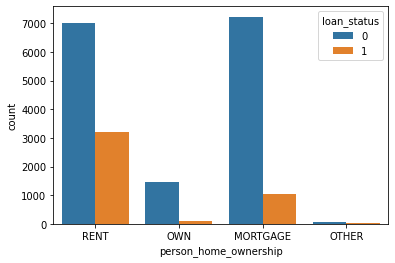

In [ ]:
# loan grade & Loan Status
sns.countplot(x='person_home_ownership',hue='loan_status',data=loan_dataset)

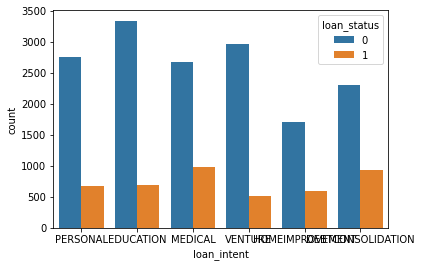

In [ ]:
# education & Loan Status
sns.countplot(x='loan_intent',hue='loan_status',data=loan_dataset)

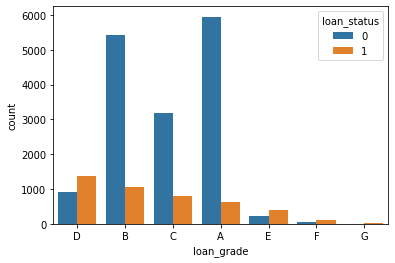

In [ ]:
# loan grade & Loan Status
sns.countplot(x='loan_grade',hue='loan_status',data=loan_dataset)

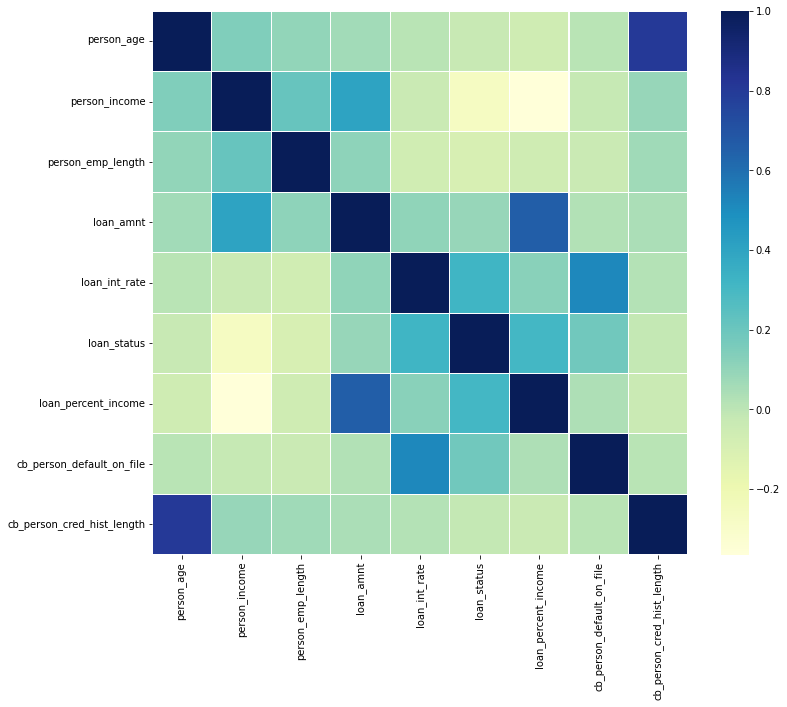

In [ ]:
# Correlation matrix before all labels are encoded
corrmat = loan_dataset.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)

In [ ]:
# convert categorical columns to numerical values
loan_dataset.replace({'loan_intent':{'EDUCATION':0,'MEDICAL':1,'VENTURE':2,'PERSONAL':3,'DEBTCONSOLIDATION':4,'HOMEIMPROVEMENT':5},
                      'person_home_ownership':{'RENT':0,'MORTGAGE':1,'OWN':2,'OTHER':3},
                      'loan_grade':{'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6}},inplace=True)

In [ ]:
loan_dataset.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,0,123.0,3,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,0,1,1000,11.14,0,0.10,0,2
2,23,65500,0,4.0,1,2,35000,15.23,1,0.53,0,2
3,21,9900,2,2.0,2,0,2500,7.14,1,0.25,0,2
4,26,77100,0,8.0,0,1,35000,12.42,1,0.45,0,3


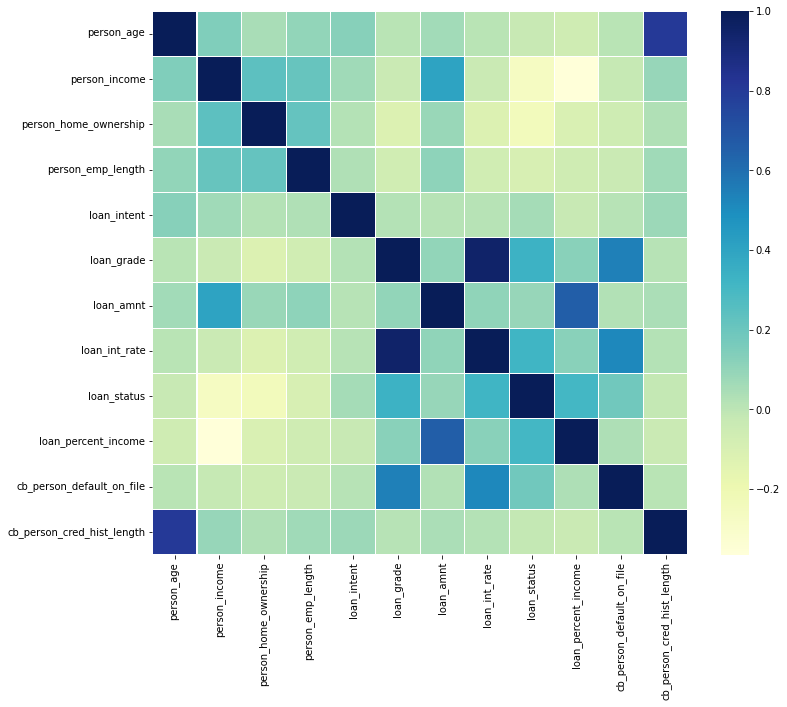

In [ ]:
# Correlation matrix with all columns encoded to numeric values
corrmat = loan_dataset.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)

In [ ]:
erro_row = loan_dataset.loc[loan_dataset["person_emp_length"] >= loan_dataset["person_age"]]

In [ ]:
erro_row.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,0,123.0,3,3,35000,16.02,1,0.59,1,3


In [ ]:
# Drop containing erroneous data in employment length
loan_dataset.drop(loan_dataset[loan_dataset["person_emp_length"] >= loan_dataset["person_age"]].index, inplace = True)

In [ ]:
# Re-check
erro_row = loan_dataset.loc[loan_dataset["person_emp_length"] >= loan_dataset["person_age"]]
erro_row.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


Apply MinMaxScaler to large values in Salry columns to make it easy for the model to learn and understand the problem

In [ ]:
# Scaling slary column and loan amount
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

loan_dataset[["ScaledSalary", "ScaledLoanAmt"]]= scaler.fit_transform(loan_dataset[["person_income", "loan_amnt"]])
loan_dataset.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,ScaledSalary,ScaledLoanAmt
1,21,9600,2,5.0,0,1,1000,11.14,0,0.10,0,2,0.000934,0.014493
2,23,65500,0,4.0,1,2,35000,15.23,1,0.53,0,2,0.010257,1.000000
3,21,9900,2,2.0,2,0,2500,7.14,1,0.25,0,2,0.000984,0.057971
4,26,77100,0,8.0,0,1,35000,12.42,1,0.45,0,3,0.012191,1.000000
5,24,83000,0,8.0,3,0,35000,8.90,1,0.42,0,2,0.013175,1.000000


In [ ]:
# separating the data and label
X = loan_dataset.drop(columns=['loan_amnt','loan_status', 'person_income'],axis=1) #independent variables
Y = loan_dataset['loan_status'] # Dependent variable

In [ ]:
print(X)
print(Y)

       person_age  person_home_ownership  person_emp_length  loan_intent  \
1              21                      2                5.0            0   
2              23                      0                4.0            1   
3              21                      2                2.0            2   
4              26                      0                8.0            0   
5              24                      0                8.0            3   
...           ...                    ...                ...          ...   
22845          52                      0                4.0            3   
22846          57                      1                1.0            3   
22847          54                      1                4.0            3   
22848          56                      1                5.0            3   
22849          66                      0                2.0            1   

       loan_grade  loan_int_rate  loan_percent_income  \
1               1          11.

Train Test Split

In [ ]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(20135, 11) (18121, 11) (2014, 11)


# Training the model:



## K-NearestNeighbor Model

In [ ]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
knnClassifier = KNeighborsClassifier(n_neighbors=5)
knnClassifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
# Predict y data with classifier: 
y_predict = knnClassifier.predict(X_test)

The F1 score is below average even though accuracy is at 80% this is a case of having class imbalance.
Class '0' has 1574 entries compared to 
Class '1' with only 440 entrie

In [ ]:
# Print results: 
print(confusion_matrix(Y_test, y_predict))
print(classification_report(Y_test, y_predict))

[[1468  106]
 [ 291  149]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1574
           1       0.58      0.34      0.43       440

    accuracy                           0.80      2014
   macro avg       0.71      0.64      0.65      2014
weighted avg       0.78      0.80      0.78      2014



## Support Vector Machine Model

In [ ]:
svmClassifier = svm.SVC(kernel='linear')

In [ ]:
#training the support Vector Macine model
svmClassifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
# accuracy score on training data
X_train_prediction = svmClassifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.8501738314662546


In [ ]:
# accuracy score on training data
X_test_prediction = svmClassifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.843098311817279


In [ ]:
stat_predict = svmClassifier.predict(X_test)

In [ ]:
# Print results: 
print(confusion_matrix(Y_test, stat_predict))
print(classification_report(Y_test, stat_predict))

[[1503   71]
 [ 245  195]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1574
           1       0.73      0.44      0.55       440

    accuracy                           0.84      2014
   macro avg       0.80      0.70      0.73      2014
weighted avg       0.83      0.84      0.83      2014



In [ ]:
print(stat_predict)

[0 0 1 ... 0 0 0]


# Predicting loan status with test data provided

## Data Preprocessing

In [ ]:
# loading the dataset to pandas DataFrame
test_dataset = pd.read_csv('/content/credit_risk_dataset_test.csv')

In [ ]:
test_dataset.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,NaN
1,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,NaN
2,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,0.44,N,4,NaN
3,26,108160,RENT,4.0,EDUCATION,E,35000,18.39,0.32,N,4,NaN
4,23,92111,RENT,7.0,MEDICAL,F,35000,20.25,0.32,N,4,NaN


In [ ]:
# Dropping the loan status column 
test_data = test_dataset.drop(columns=['loan_status'],axis=1)

test_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3
1,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4
2,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,0.44,N,4
3,26,108160,RENT,4.0,EDUCATION,E,35000,18.39,0.32,N,4
4,23,92111,RENT,7.0,MEDICAL,F,35000,20.25,0.32,N,4


In [ ]:
# number of missing values in each column
test_data.isnull().sum()

person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length             282
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_int_rate                 969
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64

In [ ]:
# dropping the missing values
test_data = test_data.dropna()

In [ ]:
# number of missing values in each column
test_data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [ ]:
# label encoding
test_data.replace({"cb_person_default_on_file":{'N':0,'Y':1}},inplace=True)

In [ ]:
# convert categorical columns to numerical values
test_data.replace({'loan_intent':{'EDUCATION':0,'MEDICAL':1,'VENTURE':2,'PERSONAL':3,'DEBTCONSOLIDATION':4,'HOMEIMPROVEMENT':5},
                      'person_home_ownership':{'RENT':0,'MORTGAGE':1,'OWN':2,'OTHER':3},
                      'loan_grade':{'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6}},inplace=True)

In [ ]:
# Scaling slary column and loan amount
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

test_data[["ScaledSalary", "ScaledLoanAmt"]]= scaler.fit_transform(test_data[["person_income", "loan_amnt"]])
test_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,ScaledSalary,ScaledLoanAmt
0,25,9600,1,1.0,1,2,5500,12.87,0.57,0,3,0.003105,0.144928
1,24,54400,0,8.0,1,2,35000,14.27,0.55,1,4,0.028303,1.000000
2,24,78956,0,5.0,1,1,35000,11.11,0.44,0,4,0.042114,1.000000
3,26,108160,0,4.0,0,4,35000,18.39,0.32,0,4,0.058540,1.000000
4,23,92111,0,7.0,1,5,35000,20.25,0.32,0,4,0.049513,1.000000


In [ ]:
new_test_data = test_data.drop(columns=['loan_amnt', 'person_income'],axis=1)
new_test_data.head()

,person_age,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,ScaledSalary,ScaledLoanAmt
0,25,1,1.0,1,2,12.87,0.57,0,3,0.003105,0.144928
1,24,0,8.0,1,2,14.27,0.55,1,4,0.028303,1.000000
2,24,0,5.0,1,1,11.11,0.44,0,4,0.042114,1.000000
3,26,0,4.0,0,4,18.39,0.32,0,4,0.058540,1.000000
4,23,0,7.0,1,5,20.25,0.32,0,4,0.049513,1.000000


In [ ]:
# Check for records containing erroneous data in employment length
error_rows = new_test_data.loc[new_test_data["person_emp_length"] >= new_test_data["person_age"]]

In [ ]:
error_rows.head()

,person_age,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,ScaledSalary,ScaledLoanAmt
53,21,1,123.0,2,0,6.54,0.1,0,4,0.105697,0.565217


In [ ]:
new_test_data.head()

,person_age,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,ScaledSalary,ScaledLoanAmt
0,25,1,1.0,1,2,12.87,0.57,0,3,0.003105,0.144928
1,24,0,8.0,1,2,14.27,0.55,1,4,0.028303,1.000000
2,24,0,5.0,1,1,11.11,0.44,0,4,0.042114,1.000000
3,26,0,4.0,0,4,18.39,0.32,0,4,0.058540,1.000000
4,23,0,7.0,1,5,20.25,0.32,0,4,0.049513,1.000000


In [ ]:
# Drop containing erroneous data in employment length
new_test_data.drop(new_test_data[new_test_data["person_emp_length"] >= new_test_data["person_age"]].index, inplace = True)

In [ ]:
new_test_data.head()

,person_age,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,ScaledSalary,ScaledLoanAmt
0,25,1,1.0,1,2,12.87,0.57,0,3,0.003105,0.144928
1,24,0,8.0,1,2,14.27,0.55,1,4,0.028303,1.000000
2,24,0,5.0,1,1,11.11,0.44,0,4,0.042114,1.000000
3,26,0,4.0,0,4,18.39,0.32,0,4,0.058540,1.000000
4,23,0,7.0,1,5,20.25,0.32,0,4,0.049513,1.000000


In [ ]:
print(new_test_data)

      person_age  person_home_ownership  person_emp_length  loan_intent  \
0             25                      1                1.0            1   
1             24                      0                8.0            1   
2             24                      0                5.0            1   
3             26                      0                4.0            0   
4             23                      0                7.0            1   
...          ...                    ...                ...          ...   
9726          52                      0                6.0            2   
9727          60                      2                5.0            3   
9728          60                      0                1.0            2   
9729          52                      0                0.0            0   
9730          65                      0                3.0            5   

      loan_grade  loan_int_rate  loan_percent_income  \
0              2          12.87            

In [ ]:
default_predict = svmClassifier.predict(new_test_data)

In [ ]:
default_predict

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
default_predict.shape

(8501,)

## Package the results

In [ ]:
input_file = pd.read_csv('/content/credit_risk_dataset_test.csv')
# Dropping the loan status column 
input_file = input_file.drop(columns=['loan_status'],axis=1)
# dropping the missing values
input_file = input_file.dropna()

In [ ]:
input_file.shape

(8502, 11)

In [ ]:
prediction_column = pd.DataFrame(default_predict, columns=["predicted_default_status"])

In [ ]:
prediction_column.shape

(8501, 1)

In [ ]:
prediction_column.head()

,predicted_default_status
0,1
1,1
2,0
3,1
4,1


In [ ]:
df2=pd.DataFrame().assign(person_age=input_file['person_age'], person_income=input_file['person_income'], person_home_ownership=input_file['person_home_ownership'], person_emp_length=input_file['person_emp_length'], loan_intent=input_file['loan_intent'], 
                          loan_grade=input_file['loan_grade'], loan_amnt	=input_file['loan_amnt'], loan_int_rate=input_file['loan_int_rate'], 
                          loan_percent_income=input_file['loan_percent_income'], cb_person_default_on_file=input_file['cb_person_default_on_file'], 
                          cb_person_cred_hist_length=input_file['cb_person_cred_hist_length'], predicted_default_status=prediction_column['predicted_default_status'])

In [ ]:
df2.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,predicted_default_status
0,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1.0
1,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1.0
2,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,0.44,N,4,0.0
3,26,108160,RENT,4.0,EDUCATION,E,35000,18.39,0.32,N,4,1.0
4,23,92111,RENT,7.0,MEDICAL,F,35000,20.25,0.32,N,4,1.0


In [ ]:
# Output the predictions to a file
df2.to_csv('credit_risk_predictions.csv')

We've seen both models (kNN and SVM) achieve over 80% on accuracy while barely getting past 55% on F1 Score. This is one of those cases where accuracy is not the best metric to show our models performance.
Class imbalance is the cause of the difference between F1 score and Accuracy. 
* Class '0' has 1574 entries VS 
* Class '1' 440 entries.

The scores will significantly improve as the entries of the two classes approach being equal in number.
* Using a Neural Net may also improve the scores significantly than using the classifiers we've used for the assessement. 
